# Loading, testing, and exploring the 'Emoji' dataset

In [229]:
!pip install transformers
!pip install torch
!pip install pandas
!pip install numpy
!pip install tabulate
!pip install emoji
import csv
import matplotlib.pyplot as mpl
import requests
import urllib
import pandas as pd
import numpy as np
from pathlib import Path
from urllib.request import urlopen

# Import Emoji dataset

In [151]:
MAPPING_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/emoji/mapping.txt"
mapping = urlopen(MAPPING_URL).read().decode('utf-8').split("\n")


TEST_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/emoji/test_labels.txt"
test_labels = urlopen(TEST_LABELS_URL).read().decode('utf-8').split("\n")


TEST_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/emoji/test_text.txt"
test_text = urlopen(TEST_TEXT_URL).read().decode('utf-8').split("\n")


TRAIN_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/emoji/train_labels.txt"
train_labels = urlopen(TRAIN_LABELS_URL).read().decode('utf-8').split("\n")


TRAIN_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/emoji/train_text.txt"
train_text = urlopen(TRAIN_TEXT_URL).read().decode('utf-8').split("\n")


VAL_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/emoji/val_labels.txt"
val_labels = urlopen(VAL_LABELS_URL).read().decode('utf-8').split("\n")


VAL_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/emoji/val_text.txt"
val_text = urlopen(VAL_TEXT_URL).read().decode('utf-8').split("\n")




In [152]:
print("Mapping information:")
print("mapping.txt length: " + str(len(mapping)) + "\n")

print("Test data information:")
print("test_labels.txt length: " + str(len(test_labels)))
print("test_text.txt length: " + str(len(test_text)) + "\n")

print("Training data information:")
print("train_labels.txt length: " + str(len(train_labels)))
print("train_text.txt length: " + str(len(train_text)) + "\n")
      
print("Value data information:")
print("val_labels.txt length: " + str(len(val_labels)))
print("val_text.txt length: " + str(len(val_text)))


Mapping information:
mapping.txt length: 21

Test data information:
test_labels.txt length: 50001
test_text.txt length: 50001

Training data information:
train_labels.txt length: 45001
train_text.txt length: 45001

Value data information:
val_labels.txt length: 5001
val_text.txt length: 5001


In [254]:
def visualiser(tweetVar, labelVar):
    tweet_array = []
    label_array = []
    for i in range(len(tweetVar)):
        tweet_array.append({"Tweet" : tweetVar[i], "Label" : labelVar[i]})
        label_array.append(i)
    dataframe = pd.DataFrame(tweet_array, index=label_array)
    dataframe = dataframe[:-1] # Drop last row, as is a blank
    return dataframe

testDataFrame = visualiser(test_text, test_labels)
trainDataFrame = visualiser(train_text, train_labels)
valDataFrame = visualiser(val_text, val_labels)

print("\n test_data and test_label: ")
display(testDataFrame)
print("\n---------------------------------------------------------------------------\n")
print("\n train_data and train_label: ")
display(trainDataFrame)
print("\n---------------------------------------------------------------------------\n")
print("\n val_data and val_label: ")
display(valDataFrame)

print("\n---------------------------------------------------------------------------\n")
print("\n mapping output: ")
for line in mapping:
    print(line)


 test_data and test_label: 


,Tweet,Label
0,en Pelham Parkway,2
1,The calm before...... | w/ sofarsounds @user |...,10
2,Just witnessed the great solar eclipse @ Tampa...,6
3,This little lady is 26 weeks pregnant today! E...,1
4,"Great road trip views! @ Shartlesville, Pennsy...",16
...,...,...
49995,@user @user @user #la #westhollywood #dtboy #l...,5
49996,Climbing subway stairs. That was nothing. #sta...,19
49997,Pops with Ms Drina at The Swanees Anniversary ...,6
49998,"We love ️ Soren! July 26, 2017 was her first d...",0



---------------------------------------------------------------------------


 train_data and train_label: 


,Tweet,Label
0,Sunday afternoon walking through Venice in the...,12
1,Time for some BBQ and whiskey libations. Chomp...,19
2,Love love love all these people ️ ️ ️ #friends...,0
3,"️ ️ ️ ️ @ Toys""R""Us",0
4,Man these are the funniest kids ever!! That fa...,2
...,...,...
44995,Here to celebrate the Nunez wedding! Love my b...,0
44996,1 night in Paris.... Wait... @ Paris Las Vegas...,1
44997,Be safe this weekend everyone. #happylaborday ...,11
44998,"Pizza (@ Five50 - @user in Las Vegas, NV)",1



---------------------------------------------------------------------------


 val_data and val_label: 


,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
...,...,...
4995,don't know what I'd do without you @ Keene Sta...,0
4996,Senior night with my little Bailey !! So proud...,3
4997,Real friends or labeled as family! #BrotherMan...,6
4998,It makes me so happy meet people wearing hats ...,3



---------------------------------------------------------------------------


 mapping output: 
0	❤	_red_heart_	
1	😍	_smiling_face_with_hearteyes_	
2	😂	_face_with_tears_of_joy_	
3	💕	_two_hearts_	
4	🔥	_fire_	
5	😊	_smiling_face_with_smiling_eyes_	
6	😎	_smiling_face_with_sunglasses_	
7	✨	_sparkles_	
8	💙	_blue_heart_	
9	😘	_face_blowing_a_kiss_	
10	📷	_camera_	
11	🇺🇸	_United_States_	
12	☀	_sun_	
13	💜	_purple_heart_	
14	😉	_winking_face_	
15	💯	_hundred_points_	
16	😁	_beaming_face_with_smiling_eyes_	
17	🎄	_Christmas_tree_	
18	📸	_camera_with_flash_	
19	😜	_winking_face_with_tongue_	



In [253]:
print("The longest tweet in testData is " + str(testDataFrame.Tweet.str.len().max()) + " bytes long.")
print("The longest tweet in trainData is " + str(trainDataFrame.Tweet.str.len().max()) + " bytes long.")
print("The longest tweet in valData is " + str(valDataFrame.Tweet.str.len().max()) + " bytes long.")
print("\n---------------------------------------------------------------------------\n")

print("The shortest tweet in testData is " + str(testDataFrame.Tweet.str.len().min()) + " bytes long.")
print("The shortest tweet in trainData is " + str(trainDataFrame.Tweet.str.len().min()) + " bytes long.")
print("The shortest tweet in valData is " + str(valDataFrame.Tweet.str.len().min()) + " bytes long.")
print("\n")


The longest tweet in testData is 167 bytes long.
The longest tweet in trainData is 143 bytes long.
The longest tweet in valData is 139 bytes long.

---------------------------------------------------------------------------

The shortest tweet in testData is 6 bytes long.
The shortest tweet in trainData is 7 bytes long.
The shortest tweet in valData is 5 bytes long.




In [259]:
'''print("\n---------------------------------------------------------------------------")
print("Ranked list of most popular emojis used in test data")    
emojiUse = testDataFrame.Label.value_counts().sort_index()
print(emojiUse)


emojiUseCountArray = []
i = 0
for val in emojiUse:
    emojiUseCountArray.append(val)
    i += 1

categoryNames = ['❤', '😍', 'camera', 'United_States',
               'sun', 'purple_heart', '😉', 'one_hundred',
               '😁', 'christmas_tree', 'camera_flash', '😜',
               '😂', 'two_hearts', 'fire', '😊',
               '😎', 'sparkles', 'blue_heart', '😘']
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(emojiUseCountArray, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.1f%%')

print("\n---------------------------------------------------------------------------")
print("\n\nPie chart showing most used emojis in test_data \n")
print("N.B. Pandas could not display more modern emojis, those have been replaced with names")
mpl.show'''
categoryNames = ['❤', '😍', 'camera', 'United_States',
               'sun', 'purple_heart', '😉', 'one_hundred',
               '😁', 'christmas_tree', 'camera_flash', '😜',
               '😂', 'two_hearts', 'fire', '😊',
               '😎', 'sparkles', 'blue_heart', '😘']


def emojiCounting(dataFrame):
    emojiUseCountArray = []
    emojiUse = dataFrame.Label.value_counts().sort_index()
    
    i = 0
    for val in emojiUse:
        emojiUseCountArray.append(val)
        i += 1
    return emojiUse



<function matplotlib.pyplot.show(close=None, block=None)>

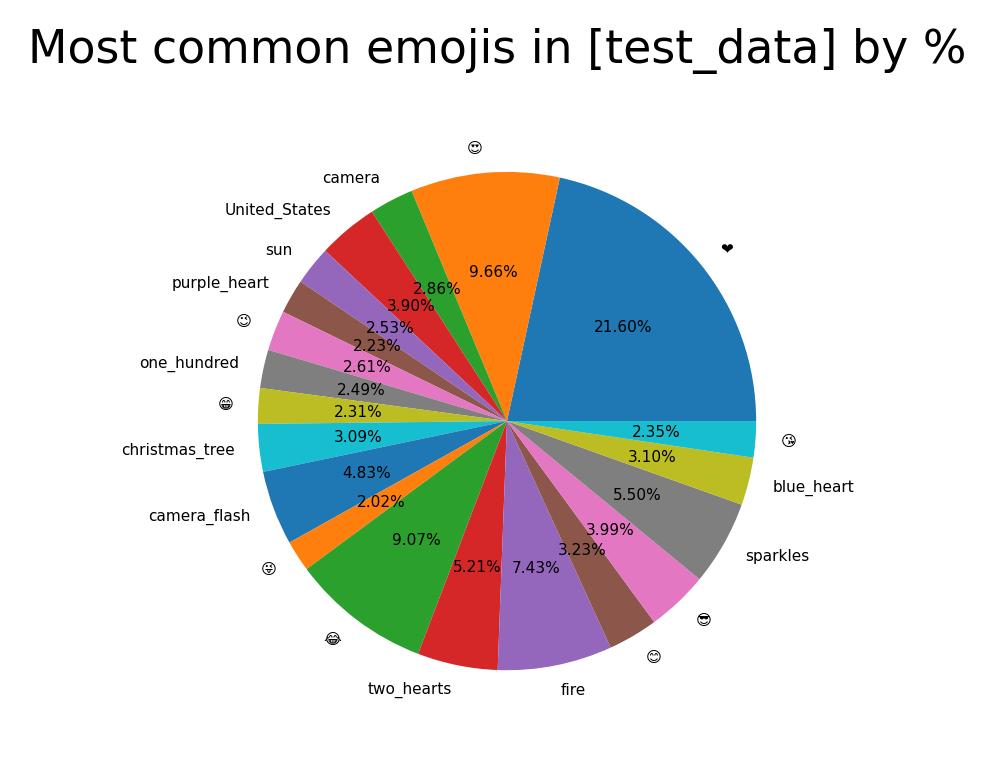

In [268]:
testDataFrameCount = emojiCounting(testDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(testDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('Most common emojis in [test_data] by %')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

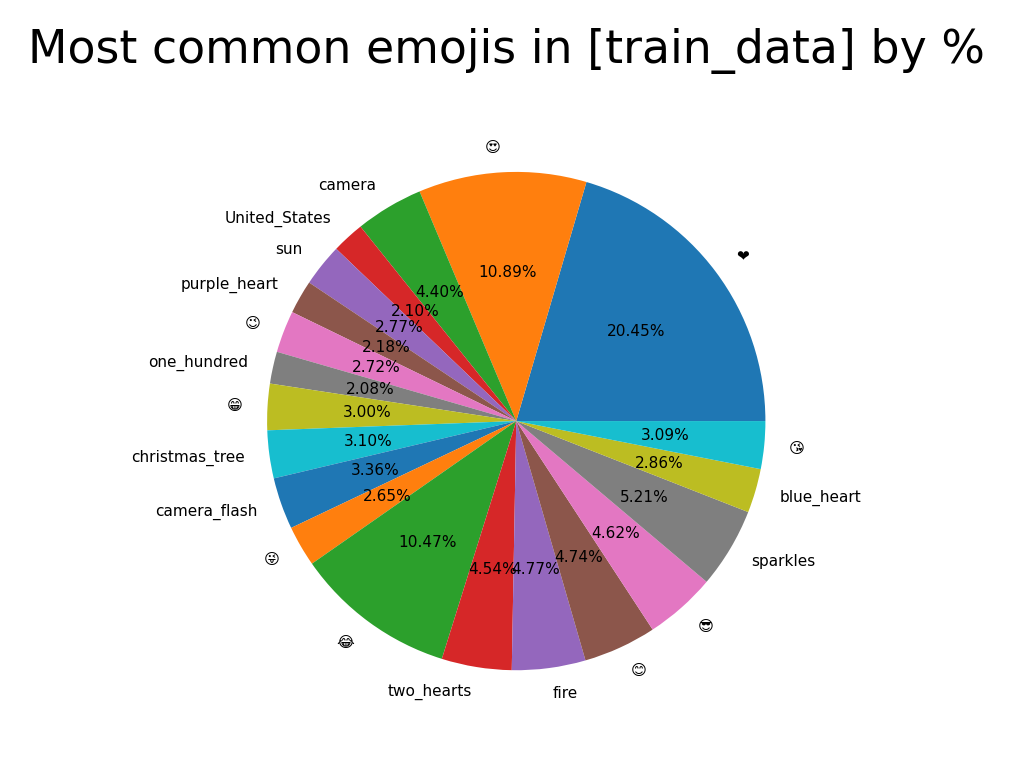

In [267]:
trainDataFrameCount = emojiCounting(trainDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(trainDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('Most common emojis in [train_data] by %')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

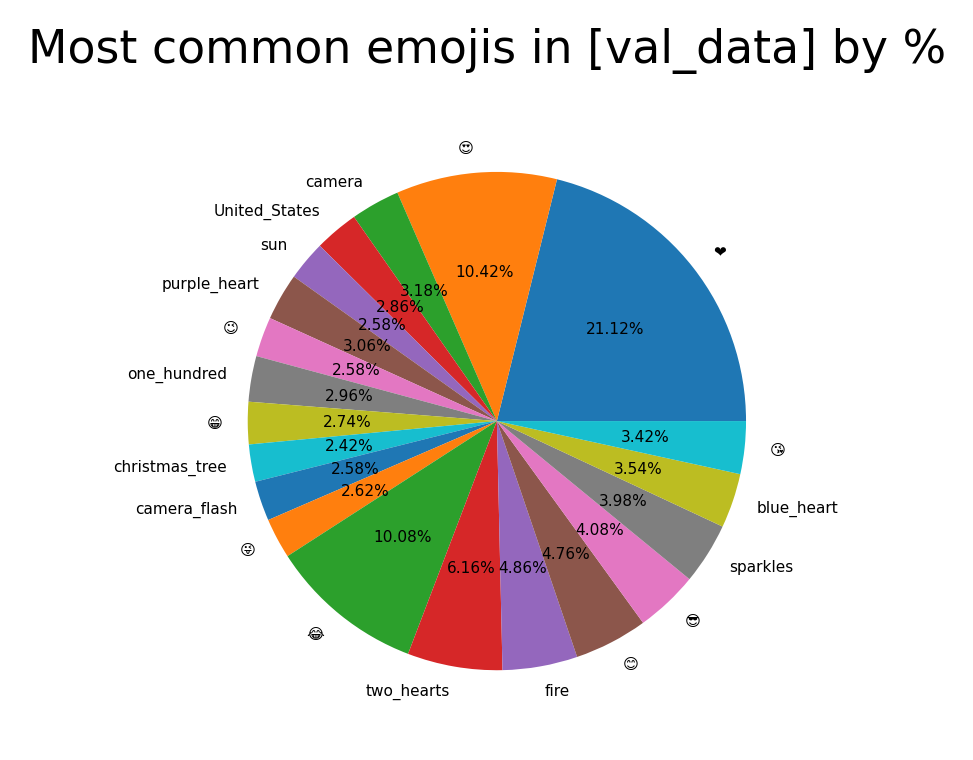

In [266]:
valDataFrameCount = emojiCounting(valDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(valDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('Most common emojis in [val_data] by %')
mpl.show